## Artificial Intelligence

### Second assignment: Decision Trees

#### PL5 | Grupo #8: Flávio Dantas (201905922), Hugo Almeida (201905410), Vítor Ferreira (201109428)
#### May 2024


### Table of Contents

- [1. Introduction and Data Analysis](#1-Introduction)
    - [1.1. restaurant dataset](#1.1-analysis1)
    - [1.2. weather dataset](#1.2-analysis2)
    - [1.3. iris dataset](#1.3-analysis3)
    - [1.4. connect4 dataset](#1.4-analysis4)   
- [2. ID3 Procedure and Implementation](#2-ID3)
    - [2.1. ID3 procedure](#2.1-procedure)
    - [2.2. ID3 implementation](#2.2-implementation)
- [3. Datasets Testing](#3-Testing)
  - [3.1. restaurant dataset](#3.1-restaurant)
  - [3.2. weather dataset](#3.2-weather)
  - [3.3. iris dataset](#3.3-iris)
  - [3.4. connect4 dataset](#3.4-connect4)
- [4. References](#4-References)

<a id="1-Introduction"></a>
## 1. Introduction and Data Analysis

The goal of this assignment is to write a program that is able to learn a decision tree from a given training dataset using the **ID3 procedure**. Furthermore, the program must be prepared to accept as input a file with test examples (without the class label) and classify them appropriately.

In this assignment, the analysis is expected to be carried out with **four** different datasets: restaurant.csv, weather.csv, iris.csv, and connect4.csv. Each of the datasets consists of different attributes and class distributions, making them represent different types of classification problems. 

Given that, first we aimed to understand the **data structure** of the datasets.

<a id="1.1-analysis1"> </a>
### 1.1. restaurant dataset 

In [30]:
import pandas as pd

# Function to load and summarize a dataset
def analyze_dataset(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)
    
    # Data types
    print("\nData Types:")
    print(data.dtypes)
    
    # Check for missing values
    print("\nMissing values:")
    print(data.isnull().sum())
    
    # Distribution of the class variable (class is the last column)
    print("\nClass Distribution:")
    print(data.iloc[:, -1].value_counts())
    
    # Description for all features
    print("\nDescription of features:")
    try:
        print(data.describe(include='all'))  # Include all to handle both categorical and numerical data
    except ValueError as e:
        print("Error in describing data:", e)

    return data

file_path = 'DS/restaurant.csv'
analyze_dataset(file_path)


Data Types:
ID       object
Alt      object
Bar      object
Fri      object
Hun      object
Pat      object
Price    object
Rain     object
Res      object
Type     object
Est      object
Class    object
dtype: object

Missing values:
ID       0
Alt      0
Bar      0
Fri      0
Hun      0
Pat      2
Price    0
Rain     0
Res      0
Type     0
Est      0
Class    0
dtype: int64

Class Distribution:
Class
Yes    6
No     6
Name: count, dtype: int64

Description of features:
        ID  Alt Bar Fri  Hun   Pat Price Rain Res  Type   Est Class
count   12   12  12  12   12    10    12   12  12    12    12    12
unique  12    2   2   2    2     2     3    2   2     4     4     2
top     X1  Yes  No  No  Yes  Full     $   No  No  Thai  0-10   Yes
freq     1    6   6   7    7     6     7    8   7     4     6     6


,ID,Alt,Bar,Fri,Hun,Pat,Price,Rain,Res,Type,Est,Class
0,X1,Yes,No,No,Yes,Some,$$$,No,Yes,French,0-10,Yes
1,X2,Yes,No,No,Yes,Full,$,No,No,Thai,30-60,No
2,X3,No,Yes,No,No,Some,$,No,No,Burger,0-10,Yes
3,X4,Yes,No,Yes,Yes,Full,$,No,No,Thai,10-30,Yes
4,X5,Yes,No,Yes,No,Full,$$$,No,Yes,French,>60,No
5,X6,No,Yes,No,Yes,Some,$$,Yes,Yes,Italian,0-10,Yes
6,X7,No,Yes,No,No,NaN,$,Yes,No,Burger,0-10,No
7,X8,No,No,No,Yes,Some,$$,Yes,Yes,Thai,0-10,Yes
8,X9,No,Yes,Yes,No,Full,$,Yes,No,Burger,>60,No
9,X10,Yes,Yes,Yes,Yes,Full,$$$,No,Yes,Italian,10-30,No


**Relevant aspects**:

- All attributes in this dataset are categorical, including the target class. ID3 is well-suited for categorical data since it splits data based on the information gain from each attribute. 
- The "Pat" column is interpreting the "None" value as missing value, which ID3 doesn't inherently handle.
- The class distribution is balanced with an equal number of Yes and No instances, which is good for training decision trees, as there is no inherent bias towards one class.

<a id="1.2-analysis2"> </a>
### 1.2. weather dataset 

In [33]:
import pandas as pd

def analyze_dataset(file_path):
    data = pd.read_csv(file_path)
    
    print("\nData Types:")
    print(data.dtypes)
    
    print("\nMissing values:")
    print(data.isnull().sum())
    
    print("\nClass Distribution:")
    print(data.iloc[:, -1].value_counts())
    
    print("\nDescription of features:")
    try:
        print(data.describe(include='all'))  
    except ValueError as e:
        print("Error in describing data:", e)

    return data

file_path = 'DS/weather.csv'
analyze_dataset(file_path)


Data Types:
ID           int64
Weather     object
Temp         int64
Humidity     int64
Windy         bool
Play        object
dtype: object

Missing values:
ID          0
Weather     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

Class Distribution:
Play
yes    9
no     5
Name: count, dtype: int64

Description of features:
             ID Weather       Temp   Humidity  Windy Play
count   14.0000      14  14.000000  14.000000     14   14
unique      NaN       3        NaN        NaN      2    2
top         NaN   sunny        NaN        NaN  False  yes
freq        NaN       5        NaN        NaN      8    9
mean     7.5000     NaN  73.571429  81.642857    NaN  NaN
std      4.1833     NaN   6.571667  10.285218    NaN  NaN
min      1.0000     NaN  64.000000  65.000000    NaN  NaN
25%      4.2500     NaN  69.250000  71.250000    NaN  NaN
50%      7.5000     NaN  72.000000  82.500000    NaN  NaN
75%     10.7500     NaN  78.750000  90.000000    NaN  NaN
max     14.

,ID,Weather,Temp,Humidity,Windy,Play
0,1,sunny,85,85,False,no
1,2,sunny,80,90,True,no
2,3,overcast,83,86,False,yes
3,4,rainy,70,96,False,yes
4,5,rainy,68,80,False,yes
5,6,rainy,65,70,True,no
6,7,overcast,64,65,True,yes
7,8,sunny,72,95,False,no
8,9,sunny,69,70,False,yes
9,10,rainy,75,80,False,yes


**Relevant aspects**:

- "Temp" and "Humidity" columns have numerical values, which could require discretization if we wish to use a strict implementation of ID3 that only handles categorical attributes. 
- There are no missing values in any of the columns, which simplifies the preprocessing step as no imputation or removal of data is required.
- The target variable "Play" shows some imbalance with more instances of "yes" (9) than "no" (5). 

<a id="1.3-analysis3"> </a>
### 1.3. iris dataset 

In [36]:
import pandas as pd

def analyze_dataset(file_path):
    data = pd.read_csv(file_path)
    
    print("\nData Types:")
    print(data.dtypes)
    
    print("\nMissing values:")
    print(data.isnull().sum())
    
    print("\nClass Distribution:")
    print(data.iloc[:, -1].value_counts())
    
    print("\nDescription of features:")
    try:
        print(data.describe(include='all'))  
    except ValueError as e:
        print("Error in describing data:", e)

    return data

file_path = 'DS/iris.csv'
analyze_dataset(file_path)


Data Types:
ID               int64
sepallength    float64
sepalwidth     float64
petallength    float64
petalwidth     float64
class           object
dtype: object

Missing values:
ID             0
sepallength    0
sepalwidth     0
petallength    0
petalwidth     0
class          0
dtype: int64

Class Distribution:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Description of features:
                ID  sepallength  sepalwidth  petallength  petalwidth  \
count   150.000000   150.000000  150.000000   150.000000  150.000000   
unique         NaN          NaN         NaN          NaN         NaN   
top            NaN          NaN         NaN          NaN         NaN   
freq           NaN          NaN         NaN          NaN         NaN   
mean     75.500000     5.843333    3.054000     3.758667    1.198667   
std      43.445368     0.828066    0.433594     1.764420    0.763161   
min       1.000000     4.300000    2.000000     1.0000

,ID,sepallength,sepalwidth,petallength,petalwidth,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


**Relevant aspects**:

- ID3 is traditionally used for categorical data. For numerical attributes like those present in the Iris dataset, discretization (converting numerical data into categorical bins) would be necessary if using a strict ID3 implementation.
- No missing values are reported across any of the attributes, which simplifies data preprocessing. 
- The target variable is perfectly balanced among the three categories (Iris-setosa, Iris-versicolor, Iris-virginica), each with 50 instances. This balance is ideal for training classification models as it avoids inherent class bias.

<a id="1.4-analysis4"> </a>
### 1.4. connect4 dataset 

In [1]:
import pandas as pd

def analyze_dataset(file_path):
    data = pd.read_csv(file_path)
    
    print("\nData Types:")
    print(data.dtypes)
    
    print("\nMissing values:")
    print(data.isnull().sum())
    
    print("\nClass Distribution:")
    print(data.iloc[:, -1].value_counts())
    
    print("\nDescription of features:")
    try:
        print(data.describe(include='all'))  
    except ValueError as e:
        print("Error in describing data:", e)

    return data

file_path = 'DS/connect4.csv'
analyze_dataset(file_path)


Data Types:
b       object
b.1     object
b.2     object
b.3     object
b.4     object
b.5     object
b.6     object
b.7     object
b.8     object
b.9     object
b.10    object
b.11    object
x       object
o       object
b.12    object
b.13    object
b.14    object
b.15    object
x.1     object
o.1     object
x.2     object
o.2     object
x.3     object
o.3     object
b.16    object
b.17    object
b.18    object
b.19    object
b.20    object
b.21    object
b.22    object
b.23    object
b.24    object
b.25    object
b.26    object
b.27    object
b.28    object
b.29    object
b.30    object
b.31    object
b.32    object
b.33    object
win     object
dtype: object

Missing values:
b       0
b.1     0
b.2     0
b.3     0
b.4     0
b.5     0
b.6     0
b.7     0
b.8     0
b.9     0
b.10    0
b.11    0
x       0
o       0
b.12    0
b.13    0
b.14    0
b.15    0
x.1     0
o.1     0
x.2     0
o.2     0
x.3     0
o.3     0
b.16    0
b.17    0
b.18    0
b.19    0
b.20    0
b.21    0
b.22    0
b

,b,b.1,b.2,b.3,b.4,b.5,b.6,b.7,b.8,b.9,...,b.25,b.26,b.27,b.28,b.29,b.30,b.31,b.32,b.33,win
0,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
1,b,b,b,b,b,b,o,b,b,b,...,b,b,b,b,b,b,b,b,b,win
2,b,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
3,o,b,b,b,b,b,b,b,b,b,...,b,b,b,b,b,b,b,b,b,win
4,b,b,b,b,b,b,b,b,b,b,...,b,b,b,o,b,b,b,b,b,win
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67551,x,x,b,b,b,b,o,x,o,b,...,b,b,b,o,o,x,b,b,b,loss
67552,x,x,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,o,x,b,draw
67553,x,x,b,b,b,b,o,o,b,b,...,b,b,b,o,x,x,o,b,b,loss
67554,x,o,b,b,b,b,o,b,b,b,...,b,b,b,o,x,o,x,x,b,draw


**Relevant aspects**:

- The features represent the state of each slot on the board as categorical data. The target variable has three possible outcomes: win, loss, and draw.
- There are no missing values reported in any of the columns, which simplifies the preprocessing steps.
- The file has no header or ID Column, which we should add later.

<a id="2-ID3"></a>
## 2. ID3 Procedure and Implementation

<a id="2.1-procedure"> </a>
### 2.1. ID3 procedure

The **ID3** algorithm, abbreviated as Iterative Dichotomiser 3, earned its name by dichotomizing features into two or more groups repeatedly at each step. It was invented by Ross Quinlan, who designed ID3 to build a decision tree using a top-down **greedy** approach. This means starting from the top of the tree and at each iteration, selecting the **best feature** available at that moment to create a node. 

Generally, ID3 is used exclusively in **classification** problems involving **categorical** features.

ID3 selects the **best feature**, using **Information Gain** (also referred to as Gain), to determine the most effective feature. Information Gain is derived by assessing the reduction in **entropy** and evaluating how effectively a given feature can isolate the target classes. 

The feature with the highest Information Gain is chosen for the node. To put it simply, entropy is a measure of disorder, and in the context of a dataset, it quantifies the disorder relative to the target feature. In binary classification scenarios, entropy will be 0 if all entries in a dataset are homogeneous, and it reaches 1 if the target variable in the dataset evenly splits the values between two classes.


Entropy is calculated as follows:

- **Entropy(S) = - ∑ pᵢ * log₂(pᵢ) ; i = 1 to n**

where:
- S is the dataset we are dealing with;
- n is the total number of attributes in the target class;
- pᵢ is the probability of class ‘i’ or the ratio of “number of rows with class i in the target column” to the “total number of rows” in the dataset.


Information Gain for a feature column A is calculated as:

- **Information Gain(S, A) = Entropy(S) - ∑((|Sᵥ| / |S|) * Entropy(Sᵥ))**

where:
- S is the dataset we are dealing with;
- Sᵥ is the set of rows in S for which the feature column A has value v;
- |Sᵥ| is the number of rows in Sᵥ and likewise |S| is the number of rows in S.


To **summarize** the ID3 procedure involves the **following steps**:
- Calculating the Information Gain of each feature.
- Splitting the dataset into subsets using the feature for which the Information Gain is maximum.
- Creating a decision tree node by using the feature with the maximum Information gain.
- If all rows belong to the same class, the current node should be a leaf node with the class as its label.
- Repeating for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

<a id="2.2-implementation"> </a>
### 2.2. ID3 implementation

Considering the information presented above and the goal of this assignment, we designed a python script (**ID3implementation.py**) that includes the Class ID3, constituted by the following methods:

1. Class Initialization (__init__ method):
The ID3 class is initialized with a target attribute name ('class'), which is the label we want to predict. The decision tree starts as empty, indicating that it hasn't been built yet.

2. Entropy Calculation (entropy method):
Entropy measures the amount of uncertainty or disorder in the dataset concerning the target attribute. This method calculates entropy by determining how evenly the classes in the dataset are distributed. Higher entropy indicates a more mixed set of classes, while lower entropy suggests more homogeneity.

3. Information Gain Calculation (information_gain method):
Information gain measures the effectiveness of an attribute in classifying the data. It is calculated by determining the difference in entropy before and after the dataset is split on an attribute. Attributes that result in the highest information gain are preferred as they provide the clearest separation of classes in the dataset.

4. Building the Decision Tree (id3 method):
This recursive method builds the decision tree based on maximizing information gain:
- Base Case: If all instances have the same class or no features are left to split the data, the recursion ends, and a leaf node is created.
- Recursive Case: The method chooses the feature with the highest information gain, splits the dataset on this feature, and recursively builds the tree for each subset of the data resulting from the split.

5. Printing the Tree (print_tree method):
This method visualizes the decision tree by printing each node and its branches in a structured format. Decision nodes show the attribute used for splitting, and leaf nodes display the predicted class and the count of instances in that class.

6. Building and Printing the Entire Tree (build_and_print_tree method):
This method combines the functionality of building the tree and printing it. It starts by identifying the features (excluding the target attribute), builds the tree using these features, and then prints the resulting tree using the previous method.

7. Classifying New Instances (classify method):
This method classifies a new example by traversing the decision tree according to the attribute values of the example. It starts from the root of the tree and moves through the decision nodes based on the attributes' values in the example until it reaches a leaf node, where it returns the class label.

In [4]:
import numpy as np
import pandas as pd


class ID3:
    def __init__(self, target_attribute_name='class'):
        """
        Initialize the ID3 classifier with the name of the target attribute and an initially empty decision tree.
        """
        self.target_attribute_name = target_attribute_name  # Name of the attribute to predict
        self.tree = None  # Initially, the decision tree is empty

    def entropy(self, target_col):
        """
        Calculate the entropy of a dataset with respect to the target column.
        Entropy is a measure of the unpredictability or the randomness of the data.
        """
        # Get unique values and their frequency counts
        _, counts = np.unique(target_col, return_counts=True)
        total = counts.sum()  # Total count of elements in the target column
        # Calculate entropy using the formula: -sum(p * log2(p))
        return np.sum([(-count / total) * np.log2(count / total) for count in counts])

    def information_gain(self, data, split_attribute_name):
        """
        Calculate the information gain of a potential split,
        based on the decrease in entropy after the dataset is split on an attribute.
        """
        # Calculate the total entropy of the dataset before any split
        total_entropy = self.entropy(data[self.target_attribute_name])
        # Get the unique values of the attribute and their corresponding counts
        vals, counts = np.unique(data[split_attribute_name], return_counts=True)
        total_counts = counts.sum()  # Total occurrences of all attributes
        # Calculate the weighted entropy after the split
        weighted_entropy = np.sum([
            (counts[i] / total_counts) * self.entropy(data[data[split_attribute_name] == vals[i]][self.target_attribute_name])
            for i in range(len(vals))
        ])
        # Information gain is the difference in entropy before and after the split
        return total_entropy - weighted_entropy


    def id3(self, data, original_data, features, parent_node_class=None):
        """
        Recursively build the decision tree based on the ID3 algorithm using entropy and information gain
        as the criteria for selecting the attribute that best separates the dataset.
        """
        # Check if all examples have the same class. If so, return this class as a leaf node.
        if len(np.unique(data[self.target_attribute_name])) <= 1:
            return np.unique(data[self.target_attribute_name])[0], len(data)

        # If no data is available, or no features are left for splits, return the majority class of the parent node.
        elif len(data) == 0 or len(features) == 0:
            return parent_node_class, len(data)

        # Otherwise, proceed with finding the best feature to split on.
        else:
            # Determine the class that appears most frequently in the current node.
            parent_node_class = np.unique(data[self.target_attribute_name])[
                np.argmax(np.unique(data[self.target_attribute_name], return_counts=True)[1])]

            # Compute the information gain for each feature and find the one with the maximum gain.
            item_values = [self.information_gain(data, feature) for feature in features]
            best_feature_index = np.argmax(item_values)
            best_feature = features[best_feature_index]

            # Create a new decision node with the best feature and an empty dictionary for its branches.
            tree = {best_feature: {}}
            # Remove the best feature from the list of available features for subsequent splits.
            remaining_features = [i for i in features if i != best_feature]

            # Iterate over all the unique values of the best feature and create subtrees for each.
            for value in np.unique(data[best_feature]):
                # Subset the data that has the current value of the best feature.
                sub_data = data[data[best_feature] == value]
                # Recursively call id3 to build the subtree under the current branch.
                subtree = self.id3(sub_data, original_data, remaining_features, parent_node_class)
                # Assign the subtree to the corresponding branch of the decision node.
                tree[best_feature][value] = subtree

            # Return the tree node, which may have multiple branches leading to further decision nodes or leaf nodes.
            return tree

    def print_tree(self, tree, indent="", last=True):
        """
        Print the decision tree in a structured format to visualize its branches and decisions.
        """
        # Choose the appropriate prefix based on whether the node is the last in its set of siblings or not.
        prefix = "└── " if last else "├── "
        # If the current tree node is a dictionary, it has children and thus represents a decision node.
        children = list(tree.items()) if isinstance(tree, dict) else []

        if not children:
            # If the node has no children, it is a leaf node. Display its decision and the sample count.
            if isinstance(tree, tuple):
                decision, count = tree
                print(f"{indent}{prefix}[Decision] {decision} (Count: {count})")
        else:
            # If the node is a decision node, display the attribute it splits on.
            attribute, branches = children[0]
            print(f"{indent}{prefix}[Attribute] {attribute}")
            # Recursively print each branch of the decision node.
            for i, (value, subtree) in enumerate(sorted(branches.items()), 1):
                # Determine if this is the last child for correct branching character.
                last_child = i == len(branches)
                subtree_indent = indent + ('    ' if last_child else '│   ')
                print(f"{subtree_indent}[Value] {value}:")
                self.print_tree(subtree, subtree_indent, last_child)

    def build_and_print_tree(self, data):
        """
        Build the decision tree from the provided dataset and then print it using the previous function.
        """
        # Extract features from the dataset excluding the target attribute column.
        features = data.columns[:-1].tolist()
        # Build the decision tree using the ID3 algorithm.
        self.tree = self.id3(data, data, features)
        # Print the tree starting from the root.
        self.print_tree(self.tree)

    def classify(self, example, tree):
        """
        Recursively classify an example based on the decision tree.
        """
        if not isinstance(tree, dict):
            # If the tree is not a dictionary, it should be a tuple representing a leaf node.
            if isinstance(tree, tuple):
                return tree[0]  # The class label
            return tree

        # Otherwise, get the root attribute and its corresponding subtree.
        attribute = next(iter(tree))
        value = example[attribute]
        subtree = tree[attribute].get(value, tree[attribute].get(None, None))  # Use a default case if value not found

        if subtree is None:
            return None  # Return None if no subtree and no default case

        # Recursively classify using the subtree.
        return self.classify(example, subtree)

<a id="3-Testing"></a>
## 3. Datasets Testing 

<a id="3.1-restaurant"></a>
### 3.1. restaurant dataset

In order to generate a **decision tree** for the **restaurant.csv** dataset following the ID3 procedure previously implemented and **classify** examples without the class label (**test1.csv**), we have generated the following script, **restaurant.py** (ensuring that the "None" values in the "Pat" column were not being treated as NaN):

In [1]:
import pandas as pd
from ID3implementation import ID3


def load_and_preprocess_data(file_path):
    """
    Load and preprocess the dataset from a CSV file.
    """
    # Load the CSV file, specifying not to treat 'None' as NA
    data = pd.read_csv(file_path, na_values=['', 'NA'], keep_default_na=False)
    data = data.drop(data.columns[0], axis=1)

    return data


def classify_new_examples(classifier, file_path):
    """
    Classify new examples using the provided classifier and dataset file path.
    """
    new_data = load_and_preprocess_data(file_path)
    new_data['Predicted Class'] = new_data.apply(lambda x: classifier.classify(x, classifier.tree), axis=1)

    return new_data


if __name__ == "__main__":
    train_file_path = 'DS/restaurant.csv'
    test_file_path = 'DS/test1.csv'

    training_data = load_and_preprocess_data(train_file_path)

    print("Decision Tree for the restaurant dataset:\n")
    id3_instance = ID3(target_attribute_name=training_data.columns[-1])
    id3_instance.build_and_print_tree(training_data)

    classified_data = classify_new_examples(id3_instance, test_file_path)
    print("\nTesting Data:\n")
    print(classified_data)

Decision Tree for the restaurant dataset:

└── [Attribute] Pat
│   [Value] Full:
│   ├── [Attribute] Hun
│   │   [Value] No:
│   │   ├── [Decision] No (Count: 2)
│       [Value] Yes:
│       └── [Attribute] Type
│       │   [Value] Burger:
│       │   ├── [Decision] Yes (Count: 1)
│       │   [Value] Italian:
│       │   ├── [Decision] No (Count: 1)
│           [Value] Thai:
│           └── [Attribute] Fri
│           │   [Value] No:
│           │   ├── [Decision] No (Count: 1)
│               [Value] Yes:
│               └── [Decision] Yes (Count: 1)
│   [Value] None:
│   ├── [Decision] No (Count: 2)
    [Value] Some:
    └── [Decision] Yes (Count: 4)

Testing Data:

    Alt  Bar  Fri  Hun   Pat Price Rain  Res     Type    Est Predicted Class
0   Yes   No   No  Yes  Some   $$$   No  Yes   French   0-10             Yes
1   Yes   No   No  Yes  Full     $   No   No     Thai  30-60              No
2    No  Yes   No   No  Some     $   No   No   Burger   0-10             Yes
3   Yes   No  Y

We can see that the decision tree correctly predicted the class. We can also notice that the generated tree is the same as the one in the book (with the exeception of Type - French). There is no example of Patrons? - Full, Hungry? - Yes, Type - French in the dataset.

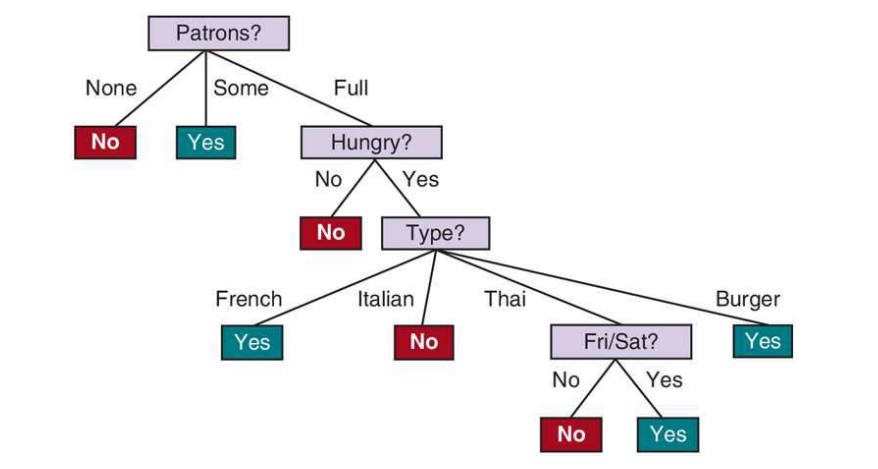

In [2]:
from IPython.display import Image
Image(filename='DT1.png')

<a id="3.2-weather"></a>
### 3.2. weather dataset

In order to generate a **decision tree** for the **weather.csv** dataset following the ID3 procedure previously implemented and **classify** examples without the class label (**test2.csv**), we have generated the script below (**weather.py**).

Given the numerical values of **"Humidity"** and **"Temp"**, we decided to discretize the values as such: 

- **Temperature ("Temp")**:
Given the range of temperatures from the sample dataset (64 to 85 degrees), we can categorize the temperatures into three bins (<= 70, 71 - 79 degrees, > 79). These bins are chosen based on the assumption that temperature ranges might influence the decision to play in distinct ways. For example, very hot temperatures might be unfavorable for playing outside.

- **Humidity**:
Humidity values range from 65 to 96 in the sample. We can discretize humidity similarly into three categories (<= 75, 76 - 89, > 89). These ranges are designed to capture potential human comfort levels at different humidity levels, assuming, for instance, that very high humidity might be uncomfortable for outdoor activities.

In [6]:
import pandas as pd
from ID3implementation import ID3


def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data = data.drop(data.columns[0], axis=1)

    data['Temp'] = pd.cut(data['Temp'], bins=[-float('inf'), 70, 79, float('inf')],
                                 labels=["<=70", "71-79", ">=80"])
    data['Humidity'] = pd.cut(data['Humidity'], bins=[-float('inf'), 75, 89, float('inf')],
                                labels=["<=75", "76-89", ">=90"])
    return data


def classify_new_examples(classifier, file_path):
    new_data = load_and_preprocess_data(file_path)
    new_data['Predicted Class'] = new_data.apply(lambda x: classifier.classify(x, classifier.tree), axis=1)

    return new_data


if __name__ == "__main__":
    train_file_path = 'DS/weather.csv'
    test_file_path = 'DS/test2.csv'

    training_data = load_and_preprocess_data(train_file_path)

    print("Decision Tree for the Weather Dataset:\n")
    id3_instance = ID3(target_attribute_name=training_data.columns[-1])
    id3_instance.build_and_print_tree(training_data)

    classified_data = classify_new_examples(id3_instance, test_file_path)
    print("\nTesting Data Classified:\n")
    print(classified_data)

Decision Tree for the Weather Dataset:

└── [Attribute] Weather
│   [Value] overcast:
│   ├── [Decision] yes (Count: 4)
│   [Value] rainy:
│   ├── [Attribute] Windy
│   │   [Value] False:
│   │   ├── [Decision] yes (Count: 3)
│       [Value] True:
│       └── [Decision] no (Count: 2)
    [Value] sunny:
    └── [Attribute] Humidity
    │   [Value] 76-89:
    │   ├── [Decision] no (Count: 1)
    │   [Value] <=75:
    │   ├── [Decision] yes (Count: 2)
        [Value] >=90:
        └── [Decision] no (Count: 2)

Testing Data Classified:

     Weather   Temp Humidity  Windy Predicted Class
0      sunny   >=80    76-89  False              no
1      sunny   >=80     >=90   True              no
2   overcast   >=80    76-89  False             yes
3      rainy   <=70     >=90  False             yes
4      rainy   <=70    76-89  False             yes
5      rainy   <=70     <=75   True              no
6   overcast   <=70     <=75   True             yes
7      sunny  71-79     >=90  False          

The tree accurately predicts the outcome. Given the proposed decision tree we could also consider simplifying the discretization of the humidity attribute to just two categories: "≤75%" and ">75%; because when the weather is sunny and the humidity is higher than 75, we always obtain "No". 

<a id="3.3-iris"></a>
### 3.3. iris dataset

In order to generate a **decision tree** for the **iris.csv** dataset following the ID3 procedure previously implemented and **classify** examples without the class label (**test3.csv**), we had to make the following changes.

As we have previously noticed, the Iris dataset contains **numerical** values, which are not suited for ID3 implementation. 

Given the larger dataset (150 lines), in order to properly examine each feature in the Iris dataset and identify potential thresholds for discretization, we have created histograms and box plots for each feature grouped by the class (Iris species). This helped us to visually identify the natural separations between species based on these measurements. This visualization helped us decide how to discretize the features in a way that preserves information regarding **class distinctions**.

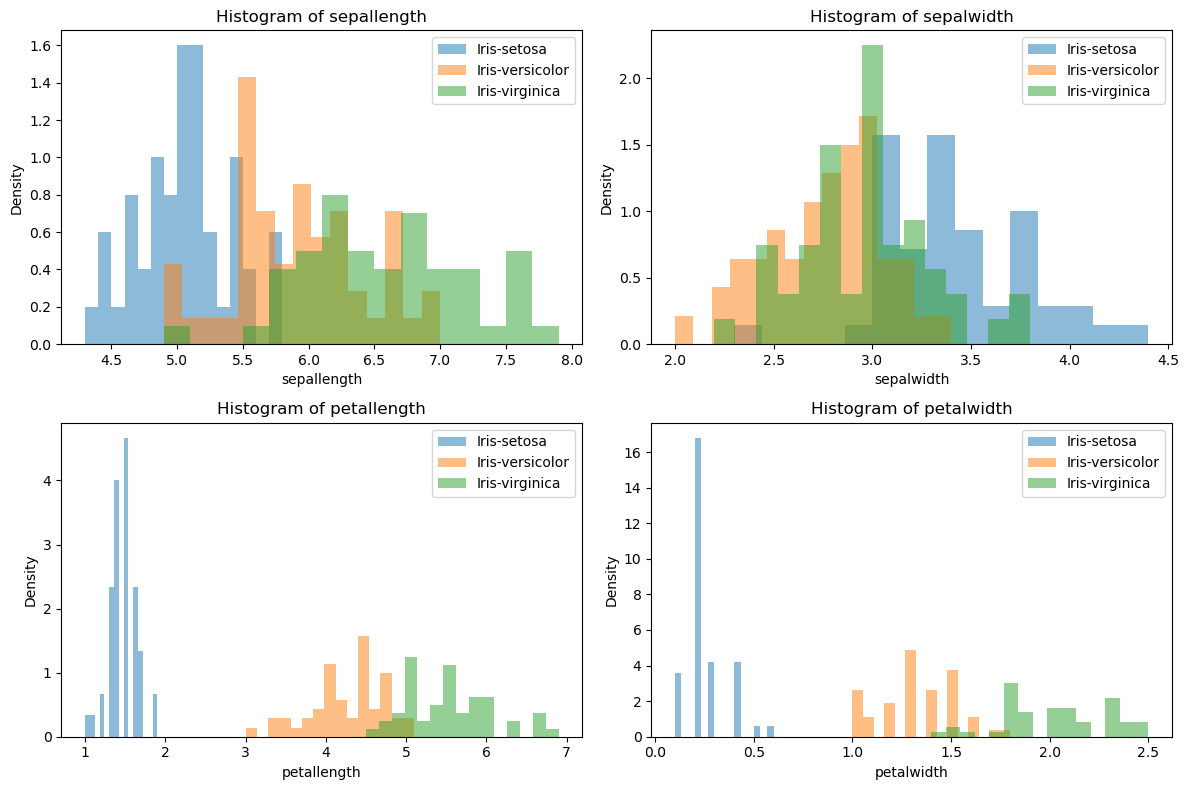

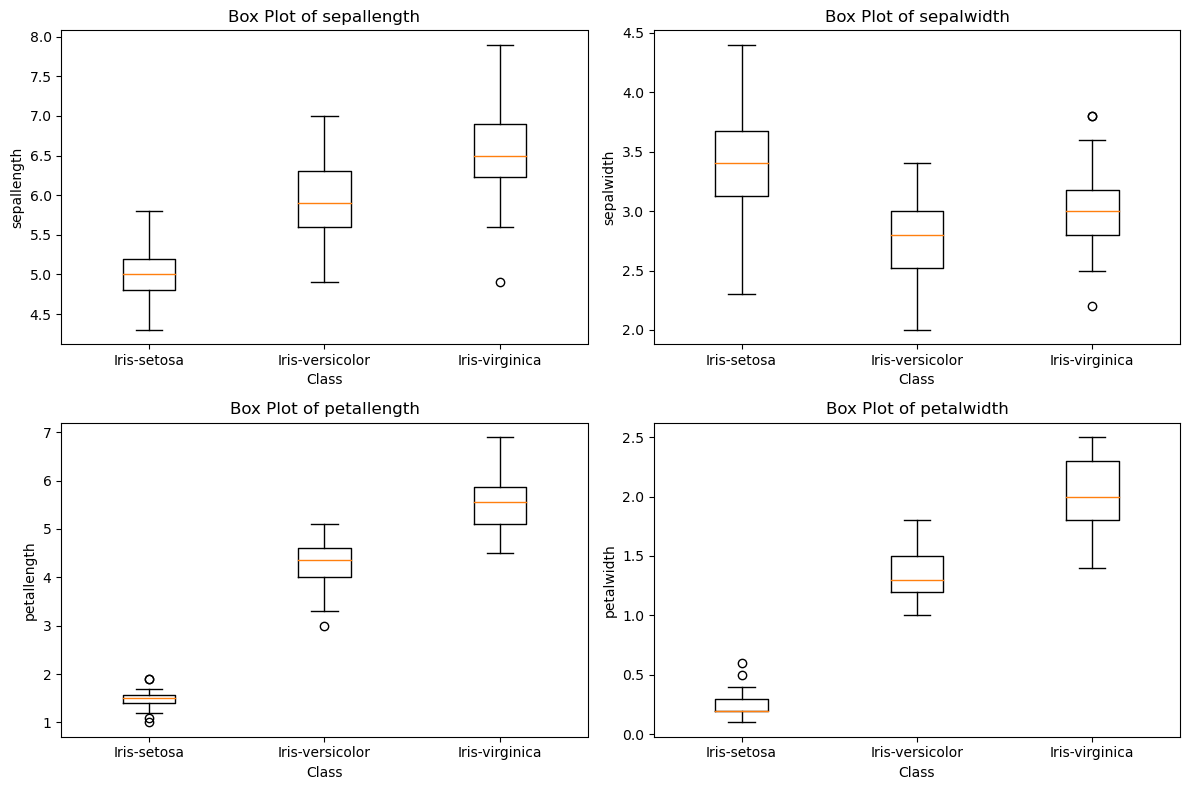

In [2]:
import pandas as pd
import matplotlib.pyplot as plt


def load_data(file_path):
    return pd.read_csv(file_path)


def plot_features(data):
    features = ['sepallength', 'sepalwidth', 'petallength', 'petalwidth']
    class_labels = data['class'].unique()

    # Creating histograms for each feature
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        for label in class_labels:
            subset = data[data['class'] == label]
            plt.hist(subset[feature], alpha=0.5, label=f'{label}', bins=15, density=True)
        plt.title(f'Histogram of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Density')
        plt.legend()

    plt.tight_layout()
    plt.show()

    # Creating box plots for each feature
    plt.figure(figsize=(12, 8))
    for i, feature in enumerate(features, 1):
        plt.subplot(2, 2, i)
        data_to_plot = [data[data['class'] == label][feature] for label in class_labels]
        plt.boxplot(data_to_plot, labels=class_labels)
        plt.title(f'Box Plot of {feature}')
        plt.xlabel('Class')
        plt.ylabel(feature)

    plt.tight_layout()
    plt.show()


# Assuming the file path is correct
file_path = 'DS/iris.csv'
iris_data = load_data(file_path)
plot_features(iris_data)


1. **Sepal Length (sepallength)**

- Iris setosa: Compact distribution primarily below 5.5 cm.
- Iris versicolor: Ranges roughly from 5.0 to 7.0 cm.
- Iris virginica: Generally ranges from 5.5 to 8.0 cm.
- Proposed threshold: Bin 1: <= 5.3, Bin 2: 5.4 - 6.9, Bin 3: > 6.9

2. **Sepal Width (sepalwidth)**

- Iris setosa: Wider sepal widths, centered around 3.5 cm.
- Iris versicolor and virginica: Overlapping distributions between 2.5 and 3.5 cm.
- Proposed threshold: Bin 1: <= 2.9, Bin 2: 3.0 - 3.3, Bin 3: > 3.3

3. **Petal Length (petallength)**

- Iris setosa: Very short petal lengths, clearly distinct, typically under 2.0 cm.
- Iris versicolor: Distributed between about 3.0 and 5.0 cm.
- Iris virginica: Mostly over 4.5 cm.
- Proposed threshold: Bin 1: <= 2.0, Bin 2: 2.1 - 4.9, Bin 3: > 4.9

4. **Petal Width (petalwidth)**

- Iris setosa: Very narrow petal widths, near 0.2 cm.
- Iris versicolor: Ranges between 1.0 and 1.7 cm.
- Iris virginica: Generally between 1.4 and 2.5 cm.
- Proposed threshold: Bin 1: <= 0.5, Bin 2: 0.6 - 1.6, Bin 3: > 1.6.

Here is the script (**iris.py**) that takes into account this discretization strategy:

In [7]:
import pandas as pd
from ID3implementation import ID3


def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data = data.drop(data.columns[0], axis=1)

    data['sepallength'] = pd.cut(data['sepallength'], bins=[-float('inf'), 5.3, 6.9, float('inf')],
                                 labels=["<=5.3", "5.4-6.9", ">6.9"])
    data['sepalwidth'] = pd.cut(data['sepalwidth'], bins=[-float('inf'), 2.9, 3.3, float('inf')],
                                labels=["<=2.9", "3.0-3.3", ">3.3"])
    data['petallength'] = pd.cut(data['petallength'], bins=[-float('inf'), 2.0, 4.9, float('inf')],
                                  labels=["<=2.0", "2.1-4.9", ">4.9"])
    data['petalwidth'] = pd.cut(data['petalwidth'], bins=[-float('inf'), 0.5, 1.6, float('inf')],
                                 labels=["<=0.5", "0.6-1.6", ">1.6"])
    return data


def classify_new_examples(classifier, file_path):
    new_data = load_and_preprocess_data(file_path)
    new_data['Predicted Class'] = new_data.apply(lambda x: classifier.classify(x, classifier.tree), axis=1)
    return new_data


if __name__ == "__main__":
    train_file_path = 'DS/iris.csv'  
    test_file_path = 'DS/test3.csv'  

    training_data = load_and_preprocess_data(train_file_path)

    print("Decision Tree for the Iris Dataset:\n")
    id3_instance = ID3(target_attribute_name=training_data.columns[-1])
    id3_instance.build_and_print_tree(training_data)

    classified_data = classify_new_examples(id3_instance, test_file_path)
    print("\nTesting Data Classified:\n")
    print(classified_data)

    # Save the classified data to a CSV file
    output_file_path = 'DS/classified_test3_results.csv'
    classified_data.to_csv(output_file_path, index=False)
    print(f"Classified data saved to {output_file_path}")


Decision Tree for the Iris Dataset:

└── [Attribute] petallength
│   [Value] 2.1-4.9:
│   ├── [Attribute] petalwidth
│   │   [Value] 0.6-1.6:
│   │   ├── [Decision] Iris-versicolor (Count: 47)
│       [Value] >1.6:
│       └── [Attribute] sepalwidth
│       │   [Value] 3.0-3.3:
│       │   ├── [Attribute] sepallength
│       │       [Value] 5.4-6.9:
│       │       └── [Decision] Iris-virginica (Count: 3)
│           [Value] <=2.9:
│           └── [Decision] Iris-virginica (Count: 4)
│   [Value] <=2.0:
│   ├── [Decision] Iris-setosa (Count: 50)
    [Value] >4.9:
    └── [Attribute] petalwidth
    │   [Value] 0.6-1.6:
    │   ├── [Attribute] sepallength
    │   │   [Value] 5.4-6.9:
    │   │   ├── [Attribute] sepalwidth
    │   │       [Value] <=2.9:
    │   │       └── [Decision] Iris-virginica (Count: 4)
    │       [Value] >6.9:
    │       └── [Decision] Iris-virginica (Count: 1)
        [Value] >1.6:
        └── [Attribute] sepalwidth
        │   [Value] 3.0-3.3:
        │   ├── [A

Given the overlap of some examples of Iris Virginica and Iris Versicolor (as shown in the histograms) the Decision Tree struggles to separate them with 100% accuracy. This discretization strategy allowed for an accurate classification of 147/150 species. There were 3 examples of Iris Versicolor that were wrongly categorized as Iris Virginica (in **classified_test3_results**).

We tried several discretization intervals. We achieved 100% accuracy with the following script (**iris2.py**):

In [16]:
import pandas as pd
from ID3implementation import ID3


def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data = data.drop(data.columns[0], axis=1)

    data['sepallength'] = pd.cut(data['sepallength'], bins=[-float('inf'), 5.8, 5.9, 6.0, 6.3, float('inf')],
                                 labels=["<=5.8", "5.9", "6.0", "6.1-6.3", ">6.3"])
    data['sepalwidth'] = pd.cut(data['sepalwidth'], bins=[-float('inf'), 3.0, float('inf')],
                                labels=["<=3.0", ">3.0"])
    data['petallength'] = pd.cut(data['petallength'], bins=[-float('inf'), 2.5, 4.9, 5, float('inf')],
                                  labels=["<=2.5", "2.6-4.9", "5.0", ">5.0"])
    data['petalwidth'] = pd.cut(data['petalwidth'], bins=[-float('inf'), 1.6, 1.7, float('inf')],
                                 labels=["<=1.6", "1.7", ">1.7"])

    return data


def classify_new_examples(classifier, file_path):
    new_data = load_and_preprocess_data(file_path)
    new_data['Predicted Class'] = new_data.apply(lambda x: classifier.classify(x, classifier.tree), axis=1)

    return new_data


if __name__ == "__main__":
    train_file_path = 'DS/iris.csv'
    test_file_path = 'DS/test3.csv'

    training_data = load_and_preprocess_data(train_file_path)

    print("Decision Tree for the Iris Dataset:\n")
    id3_instance = ID3(target_attribute_name=training_data.columns[-1])
    id3_instance.build_and_print_tree(training_data)

    classified_data = classify_new_examples(id3_instance, test_file_path)
    print("\nTesting Data Classified:\n")
    print(classified_data)

    # Save the classified data to a csv file
    output_file_path = 'DS/classified_test3_results2.csv'
    classified_data.to_csv(output_file_path, index=False)
    print(f"Classified data saved to {output_file_path}")


Decision Tree for the Iris Dataset:

└── [Attribute] petallength
│   [Value] 2.6-4.9:
│   ├── [Attribute] petalwidth
│   │   [Value] 1.7:
│   │   ├── [Decision] Iris-virginica (Count: 1)
│   │   [Value] <=1.6:
│   │   ├── [Decision] Iris-versicolor (Count: 47)
│       [Value] >1.7:
│       └── [Attribute] sepallength
│       │   [Value] 5.9:
│       │   ├── [Decision] Iris-versicolor (Count: 1)
│       │   [Value] 6.0:
│       │   ├── [Decision] Iris-virginica (Count: 1)
│       │   [Value] 6.1-6.3:
│       │   ├── [Decision] Iris-virginica (Count: 3)
│           [Value] <=5.8:
│           └── [Decision] Iris-virginica (Count: 1)
│   [Value] 5.0:
│   ├── [Attribute] sepallength
│   │   [Value] 6.0:
│   │   ├── [Decision] Iris-virginica (Count: 1)
│   │   [Value] 6.1-6.3:
│   │   ├── [Decision] Iris-virginica (Count: 1)
│   │   [Value] <=5.8:
│   │   ├── [Decision] Iris-virginica (Count: 1)
│       [Value] >6.3:
│       └── [Decision] Iris-versicolor (Count: 1)
│   [Value] <=2.5:
│   ├─

To compare the results we generated the following script:

In [21]:
import pandas as pd

def load_last_column(file_path):
    """
    Load the last column from a CSV file using pandas.
    """
    df = pd.read_csv(file_path)
    # Select the last column using iloc
    last_column = df.iloc[:, -1]
    return last_column

def compare_columns(file_path1, file_path2):
    """
    Compare the last columns of two CSV files.
    """
    last_column1 = load_last_column(file_path1)
    last_column2 = load_last_column(file_path2)

    # Check if both columns have the same length
    if len(last_column1) != len(last_column2):
        return "Columns have different lengths."

    # Perform comparison
    comparison_results = last_column1.equals(last_column2)

    # Check if all values match
    if comparison_results:
        return "All entries in the last columns match."
    else:
        # Find mismatches if not all values match
        mismatches = last_column1[last_column1 != last_column2]
        return f"Mismatches found at indices: {mismatches.index.tolist()}"

file_path1 = 'DS/iris.csv'
file_path2 = 'DS/classified_test3_results2.csv'
result = compare_columns(file_path1, file_path2)
print(result)

All entries in the last columns match.


<a id="3.1-connect4"></a>
### 3.4. connect4 dataset

In order to generate a **decision tree** for the **connect4.csv** dataset following the ID3 procedure previously implemented and **classify** examples without the class label (**test4.csv**), we first had to add an header and ID column to the dataset (**connect4_edited.csv**).

The header follows the board display described in the website:


**Board display**:

- 6 . . . . . . .
- 5 . . . . . . .
- 4 . . . . . . .
- 3 . . . . . . .
- 2 . . . . . . .
- 1 . . . . . . .
-   a b c d e f g


**Other relevant aspects**:
- x is the first player; o the second.
- The outcome class is the game theoretical value for the first player.

To induce the tree and classify a file without class labels (**classified_test4_results.csv**), we generated the following script (**connect4.py**):

In [18]:
import pandas as pd
from ID3implementation import ID3


def load_and_preprocess_data(file_path):
    data = pd.read_csv(file_path)
    data = data.drop(data.columns[0], axis=1)
    return data


def classify_new_examples(classifier, file_path):
    new_data = load_and_preprocess_data(file_path)
    new_data['Predicted Class'] = new_data.apply(lambda x: classifier.classify(x, classifier.tree), axis=1)
    return new_data


if __name__ == "__main__":
    train_file_path = 'DS/connect4_edited.csv'
    test_file_path = 'DS/test4.csv'

    training_data = load_and_preprocess_data(train_file_path)

    print("Decision Tree for the Connect4 Dataset:\n")
    id3_instance = ID3(target_attribute_name=training_data.columns[-1])
    id3_instance.build_and_print_tree(training_data)

    classified_data = classify_new_examples(id3_instance, test_file_path)
    print("\nTesting Data Classified:\n")
    print(classified_data)

    # Save the classified data to a CSV file
    output_file_path = 'DS/classified_test4_results.csv'
    classified_data.to_csv(output_file_path, index=False)
    print(f"Classified data saved to {output_file_path}")


Decision Tree for the Connect4 Dataset:



IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)




Testing Data Classified:

      a1 a2 a3 a4 a5 a6 b1 b2 b3 b4  ... f4 f5 f6 g1 g2 g3 g4 g5 g6  \
0      b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   
1      b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   
2      b  b  b  b  b  b  o  b  b  b  ...  b  b  b  b  b  b  b  b  b   
3      b  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   
4      o  b  b  b  b  b  b  b  b  b  ...  b  b  b  b  b  b  b  b  b   
...   .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. ..   
67552  x  x  b  b  b  b  o  x  o  b  ...  b  b  b  o  o  x  b  b  b   
67553  x  x  b  b  b  b  o  b  b  b  ...  b  b  b  o  x  o  o  x  b   
67554  x  x  b  b  b  b  o  o  b  b  ...  b  b  b  o  x  x  o  b  b   
67555  x  o  b  b  b  b  o  b  b  b  ...  b  b  b  o  x  o  x  x  b   
67556  x  o  o  o  x  b  o  b  b  b  ...  b  b  b  x  b  b  b  b  b   

      Predicted Class  
0                 win  
1                 win  
2                 win  
3                 win  


Given the size of the dataset, the generated tree is so large that is impossible to "read" it (it does not even show in the jupyter notebook). However, we also developed an extra method that allowed to save the tree in a .txt file (decision_tree.txt). To compare the outcome (connect4_edited.csv) with the predicted class (classified_test4_results.csv) we generated the following script:

In [22]:
import pandas as pd

def load_last_column(file_path):
    """
    Load the last column from a CSV file using pandas.
    """
    df = pd.read_csv(file_path)
    # Select the last column using iloc
    last_column = df.iloc[:, -1]
    return last_column

def compare_columns(file_path1, file_path2):
    """
    Compare the last columns of two CSV files.
    """
    last_column1 = load_last_column(file_path1)
    last_column2 = load_last_column(file_path2)

    # Check if both columns have the same length
    if len(last_column1) != len(last_column2):
        return "Columns have different lengths."

    # Perform comparison
    comparison_results = last_column1.equals(last_column2)

    # Check if all values match
    if comparison_results:
        return "All entries in the last columns match."
    else:
        # Find mismatches if not all values match
        mismatches = last_column1[last_column1 != last_column2]
        return f"Mismatches found at indices: {mismatches.index.tolist()}"

file_path1 = 'DS/connect4_edited.csv'
file_path2 = 'DS/classified_test4_results.csv'
result = compare_columns(file_path1, file_path2)
print(result)



All entries in the last columns match.


We did not succeed in making the AI agent use the DT effectively. However we tried to hypothesize what would happen based on our observations and understanding of both decision trees and heuristic functions:

- The decision tree generated for Connect4 turned out to be extremely large.
- Navigating such a large tree in real-time would be computationally intensive, leading to slow decision-making.
- A Decsion Tree of this size is prone to **overfitting**, meaning it might perform well on the training data but poorly on new, unseen game states. This lack of generalization would probably result in an AI agent that struggles to handle novel situations effectively, reducing its overall performance in actual gameplay.
- The dataset used to train the Decision Tree for Connect4 only predicted the winner based on the first 8 moves of the game. This means that no more than 8 pieces were filled on the board. Consequently, the tree is limited in its ability to make predictions beyond the early stages of the game. As the game progresses and more pieces are placed on the board, the DT's predictions would become increasingly inaccurate and less useful.

Thus, we believe that a well-designed heuristic function generalizes better to new game states. It captures essential patterns and strategies without overfitting to specific instances, making it more robust in actual gameplay.

<a id="4-References"></a>
## 4. References

[BOOKS]

- S. Russell, P. Norvig; Artificial Intelligence: A Modern Approach, 3rd ed, Prentice Hall, 2009.

- N. Nilsson; Artifical Intelligence: a New Synthesis, Morgan Kaufmann Publishers, 1998. 



[WEBSITES AND CODE]

- https://archive.ics.uci.edu/dataset/26/connect+4

- https://towardsdatascience.com/decision-trees-for-classification-id3-algorithm-explained-89df76e72df1

- https://medium.com/@anirudhsreekumar98/decision-tree-id3-algorithm-f74875fa507d

- https://chat.openai.com/
